In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ErrorbarContainer object of 3 artists>

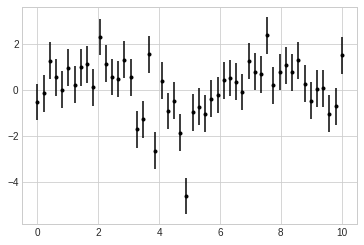

In [3]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k')

In [4]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='k',
            ecolor='lightgray', elinewidth='3', capsize=0);

TypeError: Cannot cast array data from dtype('<U1') to dtype('float64') according to the rule 'safe'

<Figure size 432x288 with 1 Axes>

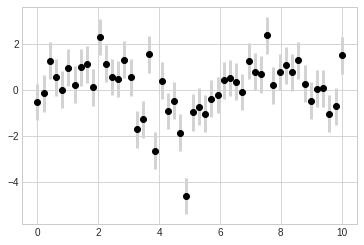

In [5]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='k',
            ecolor='lightgray', elinewidth=3, capsize=0);

In [8]:
from sklearn.gaussian_process import GaussianProcess

model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
                    random_start=100)

gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)

ImportError: cannot import name 'GaussianProcess' from 'sklearn.gaussian_process' (/home/arti/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/__init__.py)

In [9]:
from sklearn.gaussian_process import GaussianProcessRegressor

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, y_std = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(y_std)  # 2*sigma ~ 95% confidence region

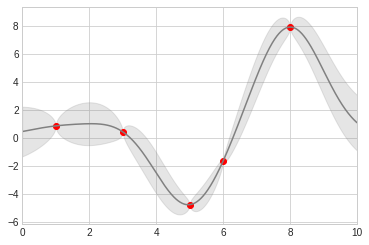

In [10]:
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                color='gray', alpha=0.2)
plt.xlim(0, 10);